In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import glob
import config
import re
import jax.numpy as jnp
import nicewebrl
from typing import List
from collections import defaultdict
from flax import serialization
import polars as pl
from glob import glob

import jax

import config
from experiment_structure import jax_web_env, env_params, describe_ruleset

Compiling environment reset and step functions.
	reset time: 0.39411473274230957
	step time: 3.184569835662842
Compiling multi-render function.
	time: 0.49559903144836426


direction: 1


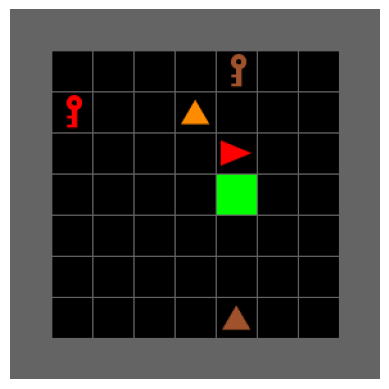

GOAL:
Tile_Near_Up_Goal(brown key, orange pyramid)

RULES:

INIT TILES:
brown key
orange pyramid
green goal
brown pyramid
red key



In [23]:
from xminigrid.experimental.img_obs import RGBImgObservationWrapper
import jax
import matplotlib.pyplot as plt
import xminigrid


def create_env_with_ruleset(ruleset_key):
  env, env_params = xminigrid.make("XLand-MiniGrid-R1-9x9")
  benchmark = xminigrid.load_benchmark(name="trivial-1m")
  rule = benchmark.sample_ruleset(jax.random.key(ruleset_key))
  rule_text = describe_ruleset(rule)

  env_params = env_params.replace(
    ruleset=rule,
    max_steps=50,
    view_size=11,
  )
  env = RGBImgObservationWrapper(env)
  return env, benchmark, env_params, rule_text


env, benchmark, env_params2, rule_text = create_env_with_ruleset(0)
rng = jax.random.PRNGKey(0)
example_timestep = env.reset(env_params2, rng)
# print('position:',  example_timestep.state.agent.position)
print("direction:", example_timestep.state.agent.direction)
from rendering import render

# render = jax.jit(render)
with jax.disable_jit():
  plt.imshow(render(example_timestep.state.grid, example_timestep.state.agent))
plt.axis("off")
plt.show()


ruleset = env_params2.ruleset
rule_text = describe_ruleset(ruleset)
print(rule_text)

direction: 2


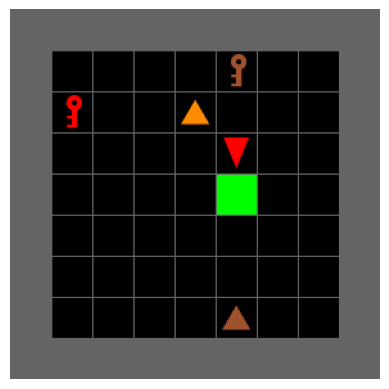

In [19]:
clockwise = 1
timestep = env.step(env_params2, example_timestep, clockwise)
# print('position:',  example_timestep.state.agent.position)
print("direction:", timestep.state.agent.direction)
from rendering import render

# render = jax.jit(render)
with jax.disable_jit():
  plt.imshow(render(timestep.state.grid, timestep.state.agent))
plt.axis("off")
plt.show()

direction: 2


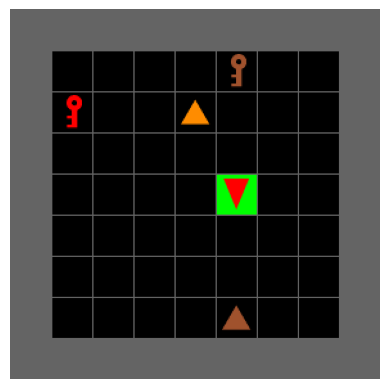

In [20]:
forward = 0
timestep = env.step(env_params2, timestep, forward)
# print('position:',  example_timestep.state.agent.position)
print("direction:", timestep.state.agent.direction)
from rendering import render

# render = jax.jit(render)
with jax.disable_jit():
  plt.imshow(render(timestep.state.grid, timestep.state.agent))
plt.axis("off")
plt.show()

In [22]:
jax.tree_map(type, env_params2)

XLandEnvParams(height=9, width=9, view_size=11, max_steps=50, render_mode='rgb_array', ruleset=RuleSet(goal=<class 'jaxlib.xla_extension.ArrayImpl'>, rules=<class 'jaxlib.xla_extension.ArrayImpl'>, init_tiles=<class 'jaxlib.xla_extension.ArrayImpl'>), grid_type='R1')